# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 2 : Propiedades en Venta</center>
## <center>Parte 1</center>
### <center> Grupo 22 </center>
### <center> Integrantes: </center>
##### <center> Federico Martin Forte,  Francisco Sobral,  Ian Klaus von der Heyde,  Juan Pablo Aschieri,  Joaquin Rivero  </center>

# Carga de Datos y librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('always')
from sklearn.model_selection import train_test_split
import shapely.speedups
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
import re
from itertools import combinations
import random

In [2]:
viviendas_train=pd.read_csv('./TP1/Datasets/viviendas_caba_train.csv').copy()
viviendas_test=pd.read_csv('./TP1/Datasets/viviendas_caba_test.csv').copy()

# 1.Procesamiento del Lenguaje Natural

## a) Ampliación del dataset

In [224]:
#dataset.head()
#dataset.minqing_hu()

## b) Modelos

# 2. Redes Neuronales

## Regresión:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

np.random.seed(1)
tf.random.set_seed(1)

In [226]:
viviendas_train.head()

start_date    end_date    latitud   longitud         barrio property_type  \
0  2021-12-15  2021-12-25 -34.555049 -58.490513       Saavedra  Departamento   
1  2021-05-20  2021-06-05 -34.546991 -58.478553       Saavedra  Departamento   
2  2021-03-20  2021-04-16 -34.570842 -58.491805  Villa Urquiza  Departamento   
3  2021-07-17  2021-10-16 -34.589251 -58.402106       Recoleta  Departamento   
4  2021-07-02  2022-02-09 -34.626290 -58.437632      Caballito  Departamento   

   property_rooms  property_bedrooms  property_surface_total  \
0             2.0                1.0                    58.0   
1             2.0                1.0                    48.0   
2             2.0                1.0                    62.0   
3             3.0                2.0                    60.0   
4             3.0                2.0                    67.0   

   property_surface_covered  property_price  \
0                      49.0        167113.0   
1                      44.0        129000.0   
2                      58.0        124600.0   
3                      60.0        196000.0   
4                      61.0        235000.0   

                                      property_title  \
0                            Departamento - Saavedra   
1                            Departamento - Saavedra   
2  Venta Depto 2 amb Anticipo + Cuotas CAC V. Urq...   
3  Excelente 3 ambientes en venta en Barrio Recoleta   
4             VENTA DEPARTAMENTO 3 AMB. EN CABALLITO   

                          geometry  
0  POINT (-58.4905135 -34.5550487)  
1   POINT (-58.4785532 -34.546991)  
2  POINT (-58.4918048 -34.5708421)  
3  POINT (-58.4021058 -34.5892511)  
4  POINT (-58.4376325 -34.6262899)

HACEr ONE HOT ENCODINFG CON LAS COLUMNAS NO NUMERICAs

**Realizamos Encoding**

Para variable property_type y barrio

In [227]:
from sklearn.preprocessing import LabelEncoder
viviendas_caba_encoded = viviendas_train.copy()
viviendas_caba_encoded['property_type'] = LabelEncoder().fit_transform(viviendas_train['property_type'])
viviendas_caba_encoded['barrio'] = LabelEncoder().fit_transform(viviendas_train['barrio'])
viviendas_caba_encoded.head(2)

start_date    end_date    latitud   longitud  barrio  property_type  \
0  2021-12-15  2021-12-25 -34.555049 -58.490513      37              1   
1  2021-05-20  2021-06-05 -34.546991 -58.478553      37              1   

   property_rooms  property_bedrooms  property_surface_total  \
0             2.0                1.0                    58.0   
1             2.0                1.0                    48.0   

   property_surface_covered  property_price           property_title  \
0                      49.0        167113.0  Departamento - Saavedra   
1                      44.0        129000.0  Departamento - Saavedra   

                          geometry  
0  POINT (-58.4905135 -34.5550487)  
1   POINT (-58.4785532 -34.546991)

In [228]:
dataset_trabajo=viviendas_caba_encoded[['latitud', 'longitud', 'barrio','property_type','property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price']]

dataset_trabajo_bueno = dataset_trabajo.copy()
#A BORRAR
dataset_trabajo = dataset_trabajo[:1000]


/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

In [229]:
dataset_trabajo.head()

latitud   longitud  barrio  property_type  property_rooms  \
0 -34.555049 -58.490513      37              1             2.0   
1 -34.546991 -58.478553      37              1             2.0   
2 -34.570842 -58.491805      55              1             2.0   
3 -34.589251 -58.402106      35              1             3.0   
4 -34.626290 -58.437632       9              1             3.0   

   property_bedrooms  property_surface_total  property_surface_covered  \
0                1.0                    58.0                      49.0   
1                1.0                    48.0                      44.0   
2                1.0                    62.0                      58.0   
3                2.0                    60.0                      60.0   
4                2.0                    67.0                      61.0   

   property_price  
0        167113.0  
1        129000.0  
2        124600.0  
3        196000.0  
4        235000.0

In [230]:
columnas_predictoras=dataset_trabajo.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras

['latitud',
 'longitud',
 'barrio',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered']

In [231]:
variables_predictoras=['latitud','longitud', 'property_surface_total', 'property_surface_covered']
#X = surf_tot, Y = price
x_train, x_test, y_train, y_test = train_test_split(dataset_trabajo.loc[:,variables_predictoras],dataset_trabajo.loc[:,'property_price'],test_size=0.2)

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

In [232]:
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(x_train))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [258]:
x_train_transform=sscaler.transform(pd.DataFrame(x_train))
x_test_transform=sscaler.transform(pd.DataFrame(x_test))

#### Modelo 1

In [234]:
# Creo un modelo Red Neuronal
d_in=4
d_out=1

modelo1 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(d_in,))]) #, activation="relu"

In [235]:
modelo1.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [267]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()


25/25 [==============================] - 0s 2ms/step


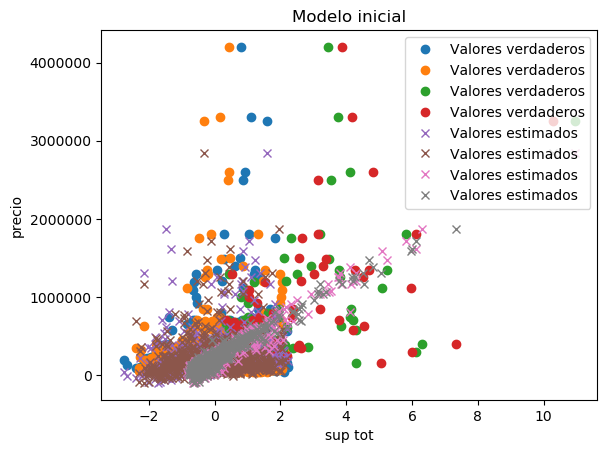

In [268]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo inicial",xlabel="sup tot",ylabel="precio")

In [238]:
modelo1.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  metrics=['mae'], 
)

In [239]:
# Entrenamiento del modelo
modelo1.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

Miremos como la red aprendio los datos con los que fue entrenada

25/25 [==============================] - 0s 4ms/step


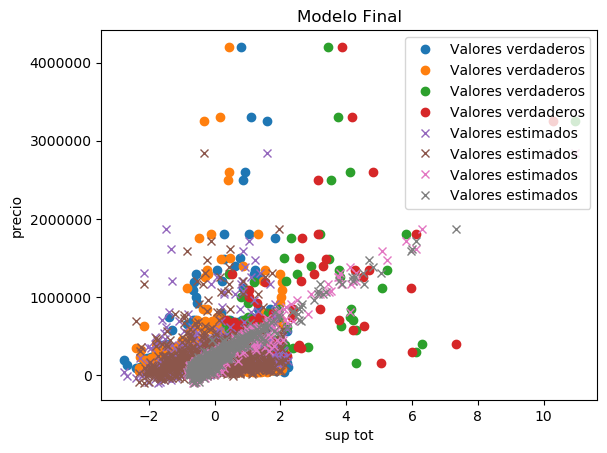

In [240]:
plot_regression(modelo1,x_train_transform,y_train,title=f"Modelo Final",xlabel="sup tot",ylabel="precio")

Miremos como la red predice

7/7 [==============================] - 0s 2ms/step


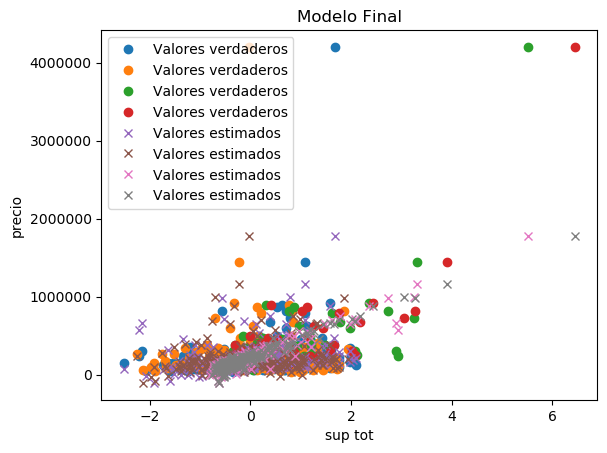

In [241]:
plot_regression(modelo1,x_test_transform,y_test,title=f"Modelo Final",xlabel="sup tot",ylabel="precio")

In [242]:
y_pred_modelo1=modelo1.predict(x_test_transform)

mae_modelo1=mean_absolute_error(y_test,y_pred_modelo1)
mse_modelo1=mean_squared_error(y_test,y_pred_modelo1)

print(f"Error absoluto medio {mae_modelo1}")
print(f"Error cuadrático medio {mse_modelo1}")
print(f"rmse {mse_modelo1**(1/2)}")

7/7 [==============================] - 0s 3ms/step
Error absoluto medio 77762.5858984375
Error cuadrático medio 40505723370.878654
rmse 201260.33730191016


#### Modelo 2

In [243]:
# Creo un modelo Red Neuronal
d_in=4
d_out=1

modelo2 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(2, activation="tanh" ),
    keras.layers.Dense(d_out, )])

In [244]:
modelo2.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 2)                 10        
                                                                 
 dense_173 (Dense)           (None, 2)                 6         
                                                                 
 dense_174 (Dense)           (None, 1)                 3         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [245]:
modelo2.compile(
  optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

In [246]:
# Entrenamiento del modelo
modelo2.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

Este es el numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos, cada ciclo los 1000 datos pasaran por la red neuronal. Si se especifica el parametro batch size cada ciclo (epoch) tendra más ejecuciones internas, estas ejecuciones se llaman iteraciones, si tenemos un batch size de 100, se tendran 10 iteraciones para completar un ciclo, en cada iteración se ejecutan los algoritmos de forwardpropagation y backpropagation, de esta manera la red neuronal actualiza más veces los parametros W (pesos) y b (bias).

Verificamos cómo aprendio los datos de entrenamiento

25/25 [==============================] - 0s 2ms/step


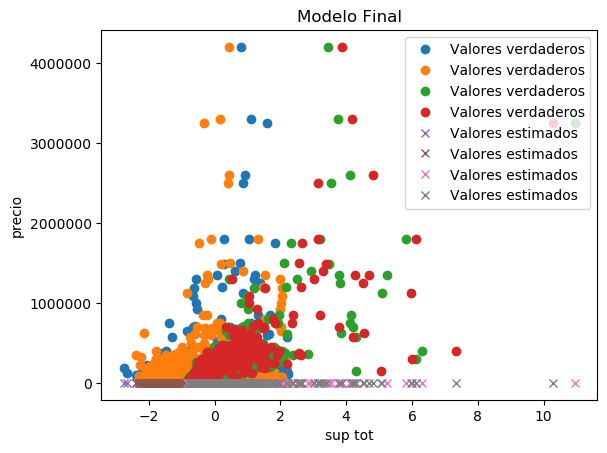

In [247]:
plot_regression(modelo2,x_train_transform,y_train,title=f"Modelo Final",xlabel="sup tot",ylabel="precio")

Evaluamos el modelo en el dataset de test

7/7 [==============================] - 0s 4ms/step


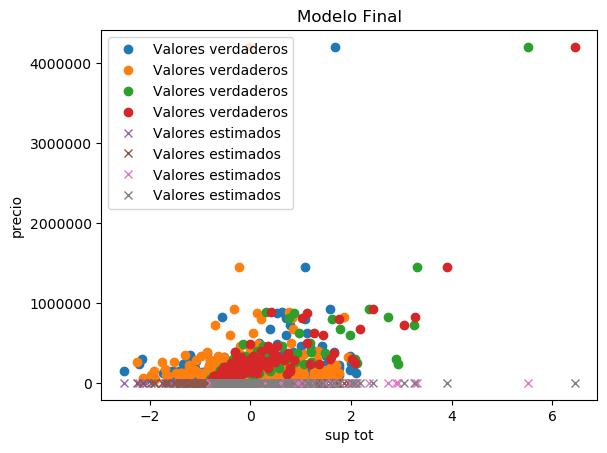

In [248]:
plot_regression(modelo2,x_test_transform,y_test,title=f"Modelo Final",xlabel="sup tot",ylabel="precio")

In [249]:
y_pred=modelo2.predict(x_test_transform)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")
print(f"rmse {mse**(1/2)}")

7/7 [==============================] - 0s 3ms/step
Error absoluto medio 224002.08140821458
Error cuadrático medio 164111671752.078
rmse 405106.9880316532


#### Modelo3

Hacemos un objeto modelos para que nos sea mas facil hacer la cross validation

In [286]:
class ModeloRedes:
    def __init__(self, dataset, variables_predictoras, cantidad_de_primera_capa, funcion_activacion, optimizador, learning_rate):
        self.variables_predictoras = variables_predictoras
        self.cantidad_primera_capa = cantidad_de_primera_capa
        self.funcion_activacion = funcion_activacion
        self.optimizador = optimizador
        self.learning_rate = learning_rate
        self.metrica = None
        self.modelo = None
        
        self.x_test = None
        self.y_test = None
        self.x_train = None
        self.y_train = None
        self.dataset_trabajo = dataset[:1000]
        self.obtener_datasets()
        self.entrenar_modelo()

    #HIPERPARAMETROS: /cantidad de predictoras , cantidad de layer, neuronas por leyers, optimizador, learning rate, funcion de activacion

    def obtener_datasets(self):    
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.dataset_trabajo.loc[:,self.variables_predictoras],self.dataset_trabajo.loc[:,'property_price'],test_size=0.2)
        self.escalar_datasets()
    
    def escalar_datasets(self):
        sscaler=StandardScaler()
        sscaler.fit(pd.DataFrame(self.x_train))
        self.x_train=sscaler.transform(pd.DataFrame(self.x_train))
        self.x_test=sscaler.transform(pd.DataFrame(self.x_test))

    def entrenar_modelo(self):
    # Creo un modelo Red Neuronal
        d_in= len(self.variables_predictoras)
        d_out=1

        capas = [
            # input_shape solo en la primer capa
            # Capa con 2 salidas, activación relu
            keras.layers.Dense(d_in,input_shape=(d_in,), activation= self.funcion_activacion)
        ]

        #inserta capas que van decreciendo en cantidad de neuronas
        for i in range(self.cantidad_primera_capa,2,-1):
            capas.append(keras.layers.Dense(i, activation= self.funcion_activacion ))

        capas.append(keras.layers.Dense(d_out, ))
        self.modelo = keras.Sequential(capas)

        self.modelo.compile(
        optimizer= self.optimizador(self.learning_rate), 
        loss='mse', 
        # metricas para ir calculando en cada iteracion o batch 
        metrics=['mae'], 
        )

        self.modelo.fit(self.x_train,self.y_train,epochs=200,batch_size=16,verbose=False)

        plot_regression(self.modelo,self.x_test,self.y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")
        
    def testear_modelo(self):
        y_pred=self.modelo.predict(self.x_test)
        mse=mean_squared_error(self.y_test,y_pred)
        self.metrica = mse ** (1/2)
        return self.metrica

In [251]:
variables_predictoras=['latitud','longitud', 'property_surface_total', 'property_surface_covered']
def funcion_optimizadoraNADAM(learnigRate):
            return keras.optimizers.Nadam(learning_rate = learnigRate)

capas que hay que hacerlo con un set seed o algo para que nos de siempre los mismo resultados

/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 3ms/step


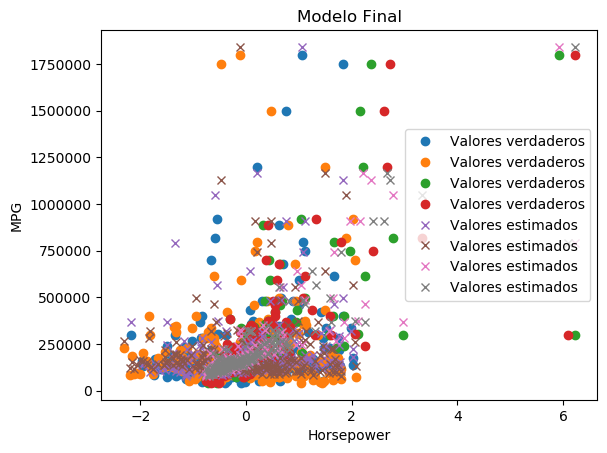

In [252]:
modelo = ModeloRedes(dataset_trabajo, variables_predictoras, 4, "relu", funcion_optimizadoraNADAM, 0.1)

In [253]:
modelo.testear_modelo()

7/7 [==============================] - 0s 2ms/step


111742.76065997386

Como se mostro en el tp1 las variables que mas describen la variacion de los datos son ['latitud','longitud', 'property_surface_total', 'property_surface_covered'] por eso solo miramos estas

In [285]:

columnas = ['latitud','longitud', 'property_surface_total', 'property_surface_covered']
posibles_variables_predictoras = []
for L in range(0, len(columnas)+1):
    for subset in combinations(columnas, L):
        posibles_variables_predictoras.append(subset)
posibles_variables_predictoras.pop(0)

posibles_cantidad_de_primera_capa = []
for i in range(1,10):
    posibles_cantidad_de_primera_capa.append(i)

posibles_funcion_activacion = ["relu", "tanh", "softmax", "sigmoid"]

posibles_learning_rate = [0.1, 0.01]

In [255]:
def funcion_optimizadoraNADAM(learnigRate):
            return keras.optimizers.Nadam(learning_rate = learnigRate)

def funcion_optimizadoraRMSPROP(learnigRate):
            return keras.optimizers.RMSprop(learning_rate = learnigRate)

def funcion_optimizadoraADAMAX(learnigRate):
            return keras.optimizers.Adamax(learning_rate = learnigRate)

def funcion_optimizadoraADADELTA(learnigRate):
            return keras.optimizers.Adadelta(learning_rate = learnigRate)

posibles_optimizador = [funcion_optimizadoraNADAM, funcion_optimizadoraRMSPROP, funcion_optimizadoraADAMAX, funcion_optimizadoraADADELTA]

In [292]:
def random_validator(cantidad_modelos, posibles_variables_predictoras, posibles_cantidad_de_primera_capa, 
    posibles_funcion_activacion, posibles_optimizador, posibles_learning_rate):
    resultados = []
    for i in range(cantidad_modelos):

        variables_predictoras = random.choice(posibles_variables_predictoras)
        cantidad_de_primera_capa = random.choice(posibles_cantidad_de_primera_capa)
        funcion_activacion = random.choice(posibles_funcion_activacion)
        optimizador = random.choice(posibles_optimizador)
        learning_rate = random.choice(posibles_learning_rate)

        print('\n','\n')
        print(i , '\n',
        variables_predictoras , '\n',
        cantidad_de_primera_capa ,'\n',
        funcion_activacion ,'\n',
        optimizador ,'\n',
        learning_rate ,'\n')

        modelo = ModeloRedes(dataset_trabajo_bueno, variables_predictoras, cantidad_de_primera_capa, funcion_activacion, optimizador, learning_rate)
        resultados.append([modelo, modelo.testear_modelo()])
        print(modelo.testear_modelo())
    return resultados


 

0 
 ('longitud', 'property_surface_total') 
 4 
 relu 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 3ms/step


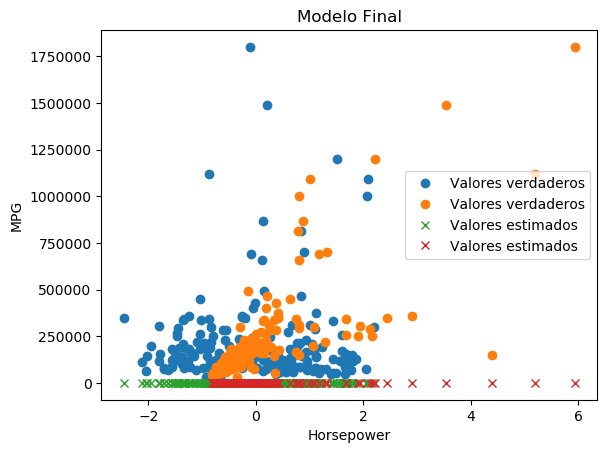

7/7 [==============================] - 0s 2ms/step
312787.00553305296

 

1 
 ('latitud', 'property_surface_covered') 
 7 
 tanh 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


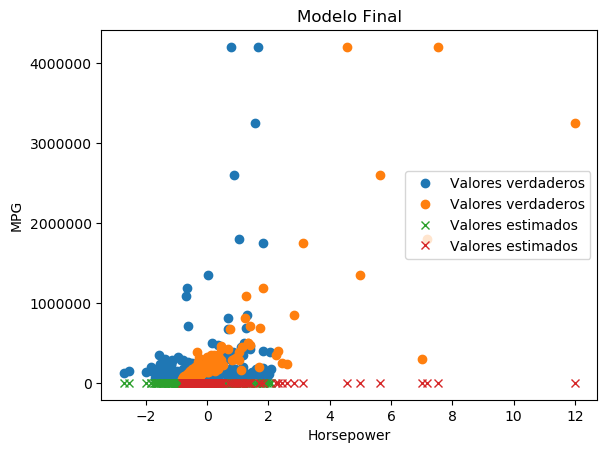

7/7 [==============================] - 0s 3ms/step
604658.8714549651

 

2 
 ('longitud', 'property_surface_total') 
 6 
 tanh 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


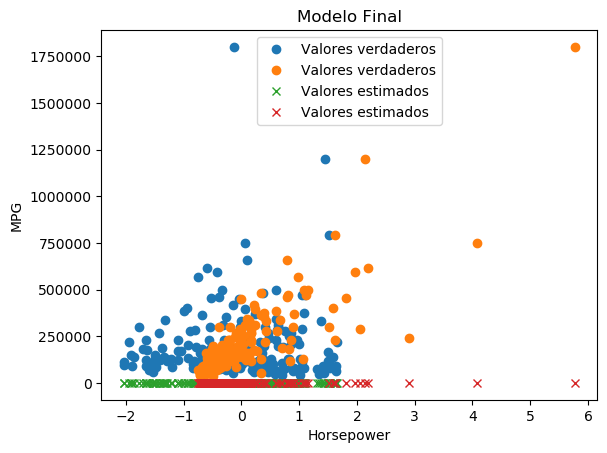

7/7 [==============================] - 0s 2ms/step
274779.0599345035

 

3 
 ('longitud', 'property_surface_total', 'property_surface_covered') 
 2 
 sigmoid 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


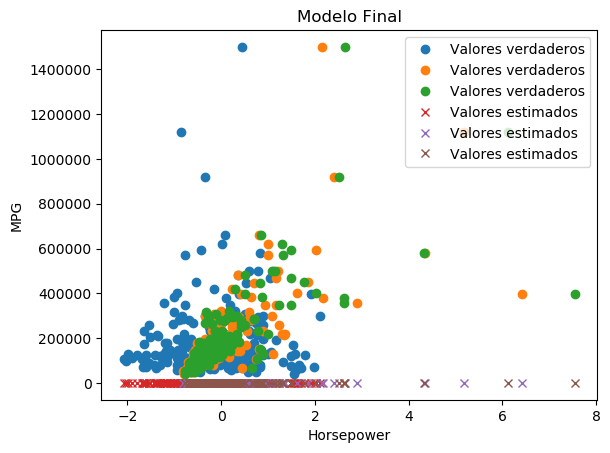

7/7 [==============================] - 0s 2ms/step
257101.1301422593

 

4 
 ('longitud',) 
 9 
 sigmoid 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


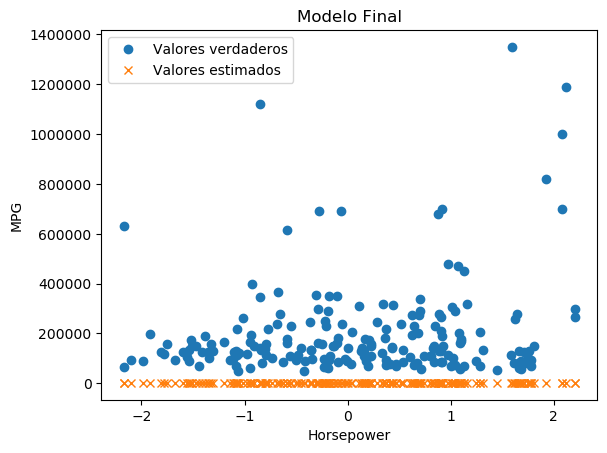

7/7 [==============================] - 0s 4ms/step
276737.0385694397

 

5 
 ('property_surface_covered',) 
 9 
 relu 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


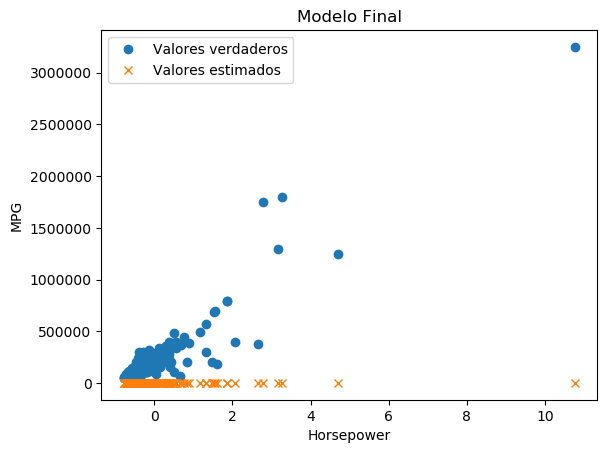

7/7 [==============================] - 0s 2ms/step
381244.48590701947

 

6 
 ('longitud', 'property_surface_total') 
 1 
 sigmoid 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


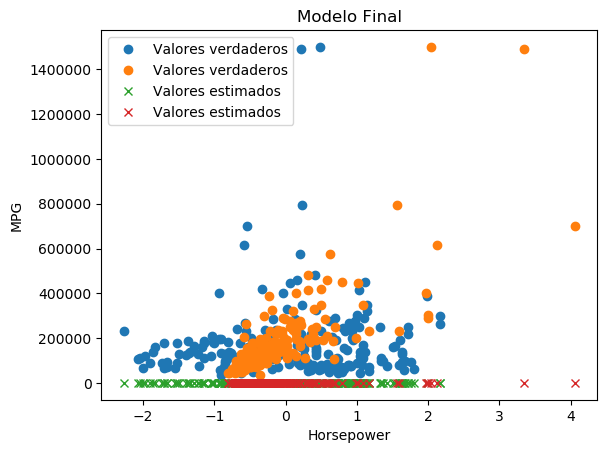

7/7 [==============================] - 0s 3ms/step
252511.70121171334

 

7 
 ('latitud', 'longitud', 'property_surface_covered') 
 2 
 sigmoid 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


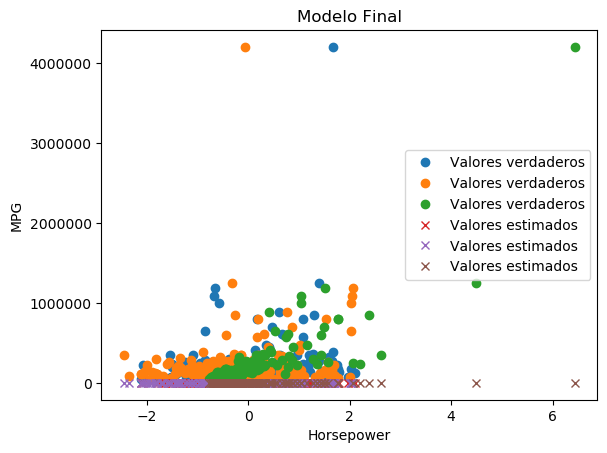

7/7 [==============================] - 0s 3ms/step
406796.79728942615

 

8 
 ('property_surface_covered',) 
 5 
 tanh 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


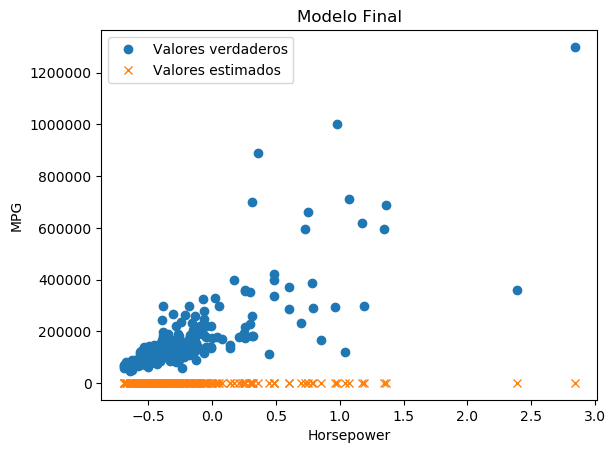

7/7 [==============================] - 0s 2ms/step
246316.2298864756

 

9 
 ('latitud', 'longitud') 
 3 
 relu 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


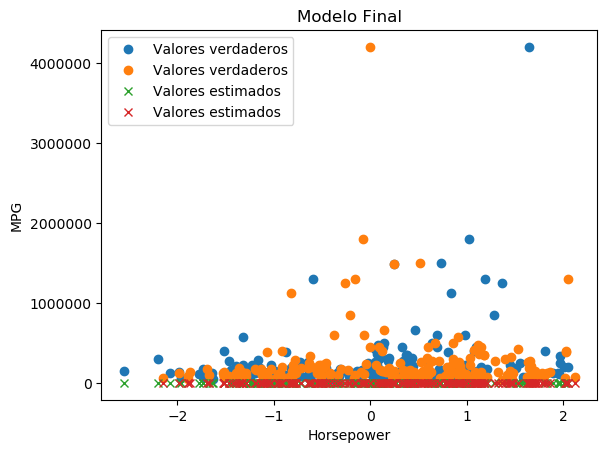

7/7 [==============================] - 0s 2ms/step
452297.4110127381

 

10 
 ('latitud',) 
 5 
 tanh 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


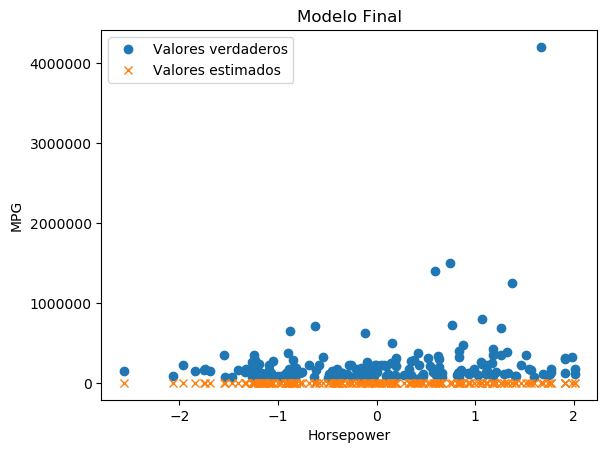

7/7 [==============================] - 0s 3ms/step
406042.4614238844

 

11 
 ('latitud', 'longitud', 'property_surface_total', 'property_surface_covered') 
 8 
 relu 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


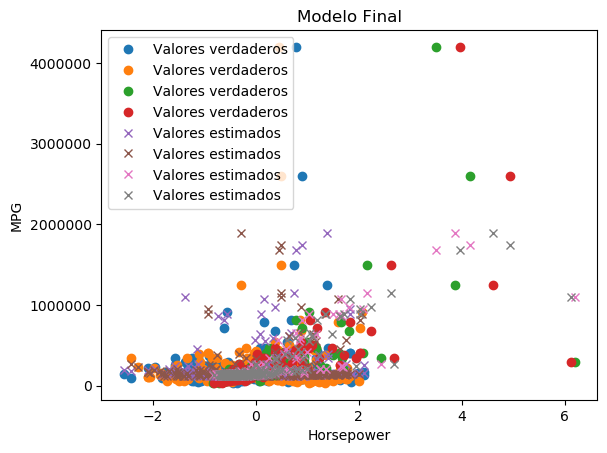

7/7 [==============================] - 0s 2ms/step
231049.00707292685

 

12 
 ('latitud', 'property_surface_covered') 
 2 
 softmax 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


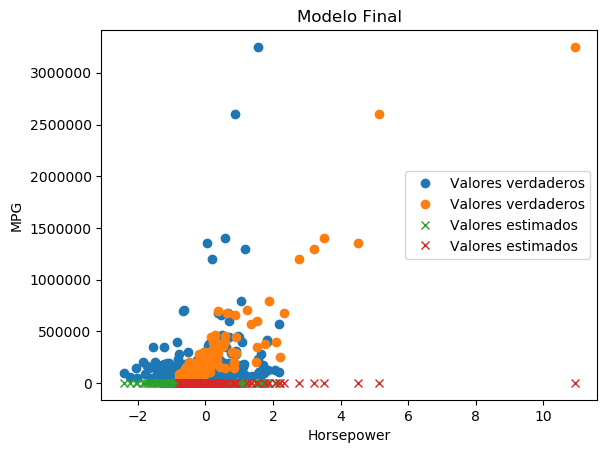

7/7 [==============================] - 0s 3ms/step
411582.360124554

 

13 
 ('latitud', 'property_surface_covered') 
 1 
 sigmoid 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


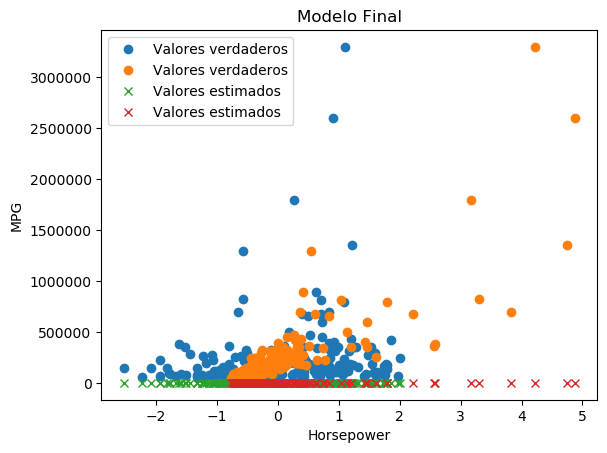

7/7 [==============================] - 0s 3ms/step
428285.0811723717

 

14 
 ('latitud', 'property_surface_total') 
 1 
 sigmoid 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


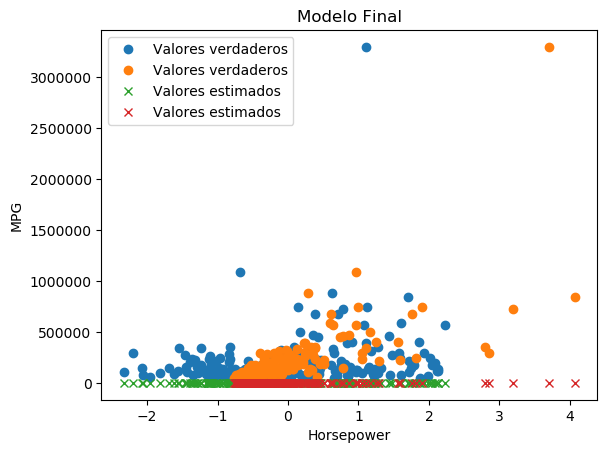

7/7 [==============================] - 0s 3ms/step
341834.21224245185

 

15 
 ('latitud', 'property_surface_total', 'property_surface_covered') 
 7 
 relu 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


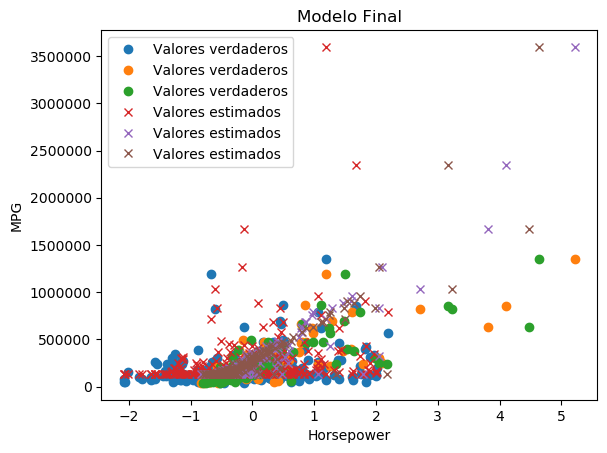

7/7 [==============================] - 0s 3ms/step
246037.66197579826

 

16 
 ('latitud',) 
 2 
 sigmoid 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


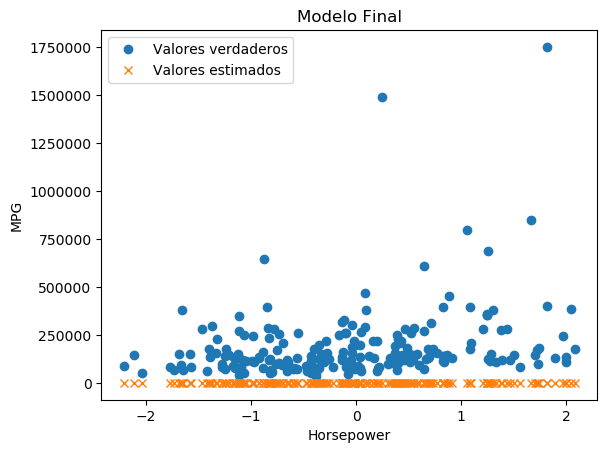

7/7 [==============================] - 0s 3ms/step
270878.32119411253

 

17 
 ('latitud',) 
 3 
 softmax 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


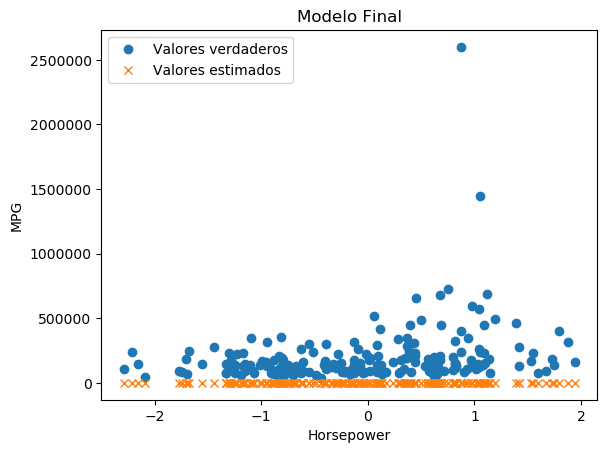

7/7 [==============================] - 0s 2ms/step
304885.6457218262

 

18 
 ('latitud', 'property_surface_covered') 
 1 
 tanh 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


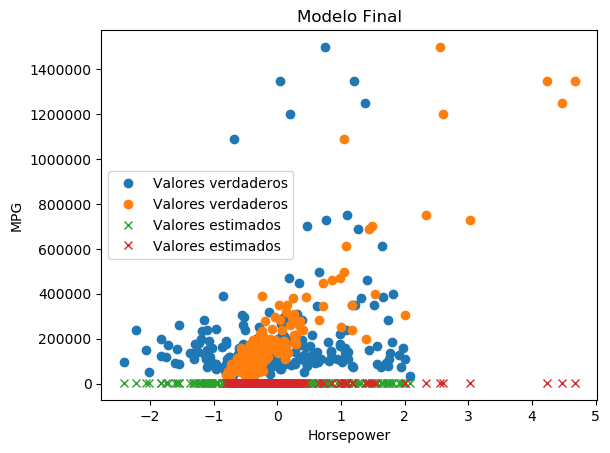

7/7 [==============================] - 0s 3ms/step
303255.6793119028

 

19 
 ('property_surface_total', 'property_surface_covered') 
 8 
 tanh 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


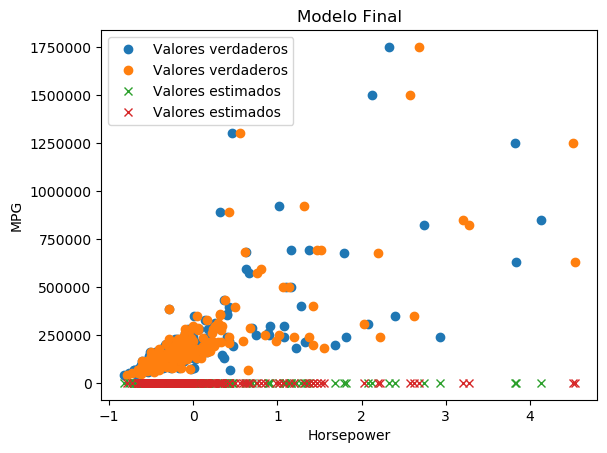

7/7 [==============================] - 0s 3ms/step
322347.60994006024

 

20 
 ('latitud', 'longitud', 'property_surface_total') 
 9 
 tanh 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


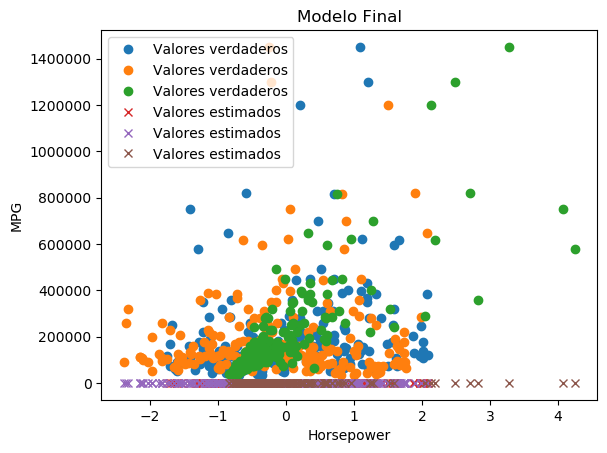

7/7 [==============================] - 0s 3ms/step
283298.58111661964

 

21 
 ('latitud', 'property_surface_covered') 
 6 
 softmax 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


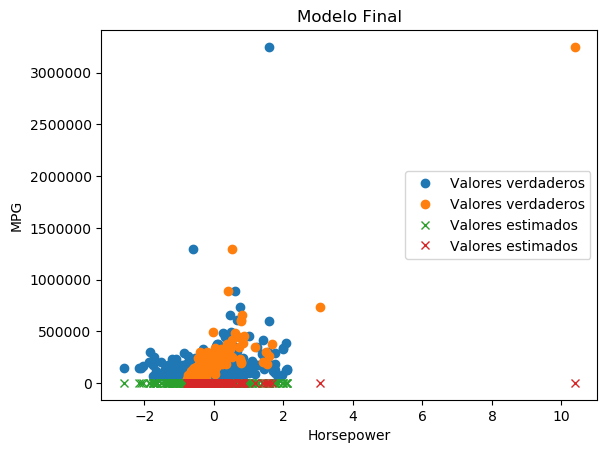

7/7 [==============================] - 0s 3ms/step
324683.0373365542

 

22 
 ('latitud', 'longitud') 
 6 
 sigmoid 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


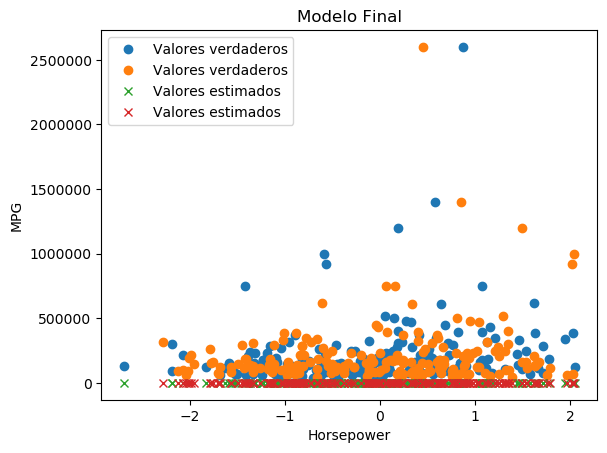

7/7 [==============================] - 0s 3ms/step
325353.71260155516

 

23 
 ('latitud', 'property_surface_total') 
 1 
 sigmoid 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


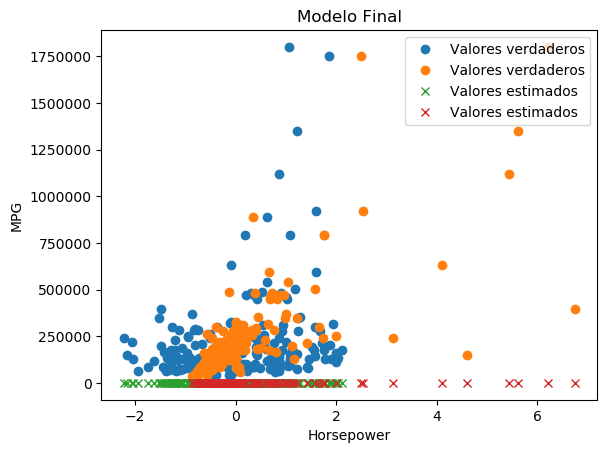

7/7 [==============================] - 0s 2ms/step
321078.56193222327

 

24 
 ('property_surface_covered',) 
 5 
 tanh 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


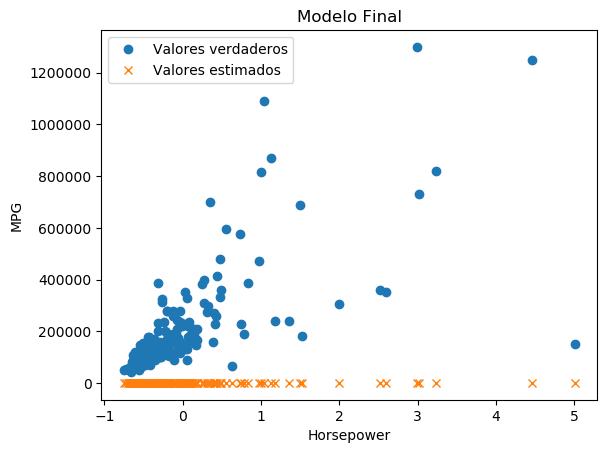

7/7 [==============================] - 0s 5ms/step
272056.2712778863

 

25 
 ('latitud', 'longitud', 'property_surface_total', 'property_surface_covered') 
 1 
 sigmoid 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


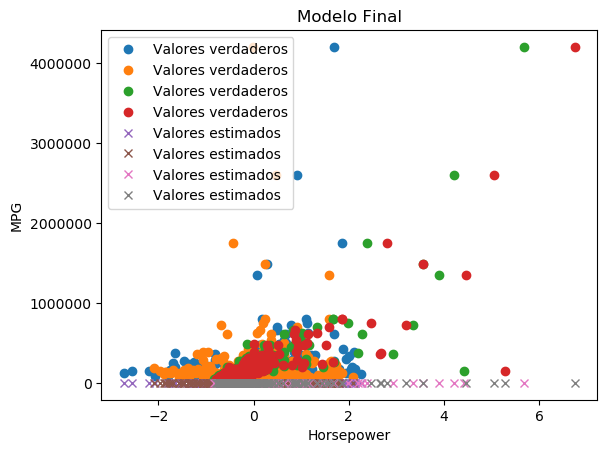

7/7 [==============================] - 0s 4ms/step
464528.37326647167

 

26 
 ('latitud', 'longitud', 'property_surface_total', 'property_surface_covered') 
 8 
 relu 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


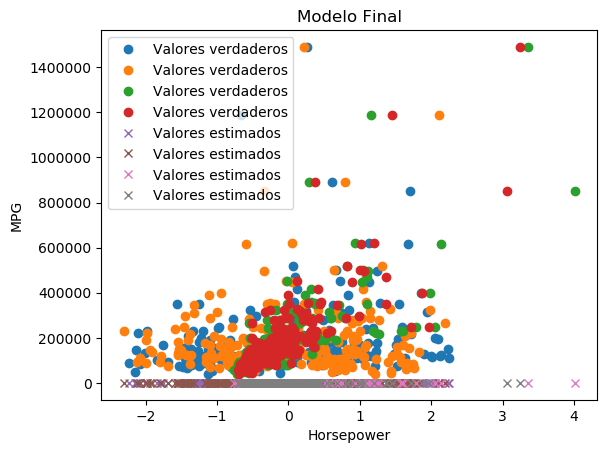

7/7 [==============================] - 0s 3ms/step
259801.1247701711

 

27 
 ('latitud', 'longitud', 'property_surface_total') 
 2 
 softmax 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


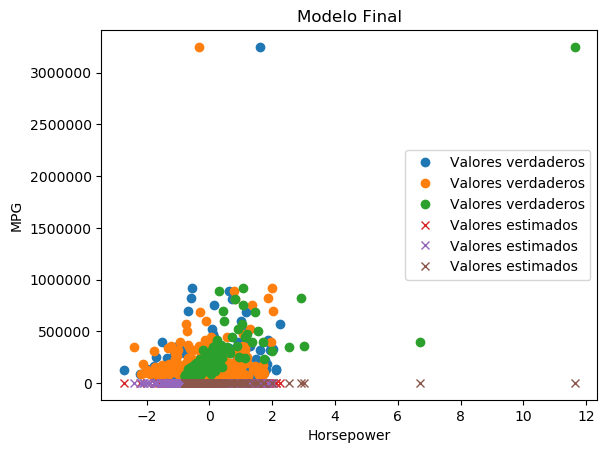

7/7 [==============================] - 0s 3ms/step
338592.34629450593

 

28 
 ('longitud', 'property_surface_covered') 
 6 
 tanh 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


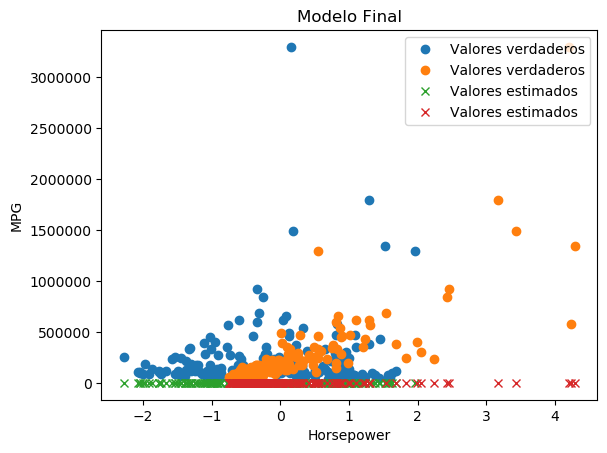

7/7 [==============================] - 0s 2ms/step
393709.9754303751

 

29 
 ('property_surface_covered',) 
 8 
 softmax 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


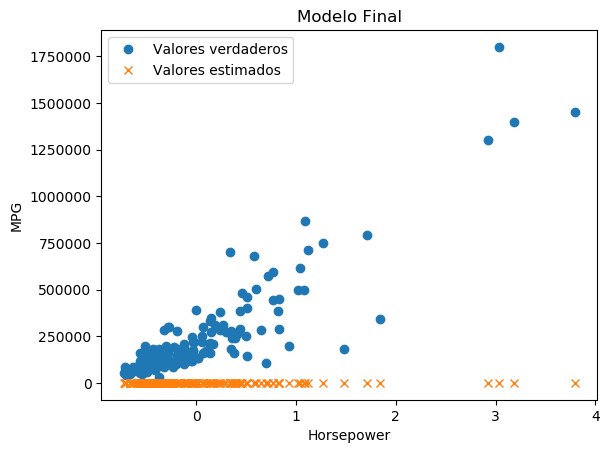

7/7 [==============================] - 0s 3ms/step
319340.66426498553

 

30 
 ('latitud', 'longitud') 
 8 
 relu 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


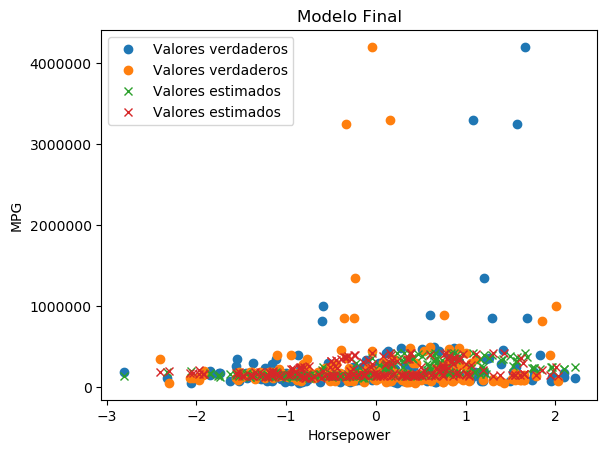

7/7 [==============================] - 0s 2ms/step
423825.5062698572

 

31 
 ('longitud', 'property_surface_total') 
 1 
 relu 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


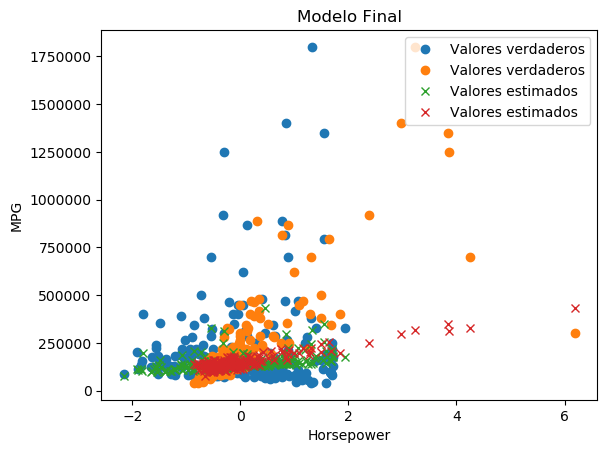

7/7 [==============================] - 0s 5ms/step
218478.97397845372

 

32 
 ('longitud', 'property_surface_total') 
 6 
 tanh 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 4ms/step


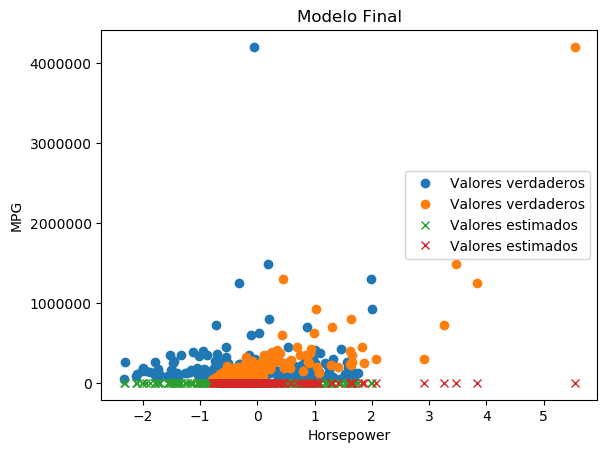

7/7 [==============================] - 0s 3ms/step
403581.99781819916

 

33 
 ('latitud',) 
 3 
 relu 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


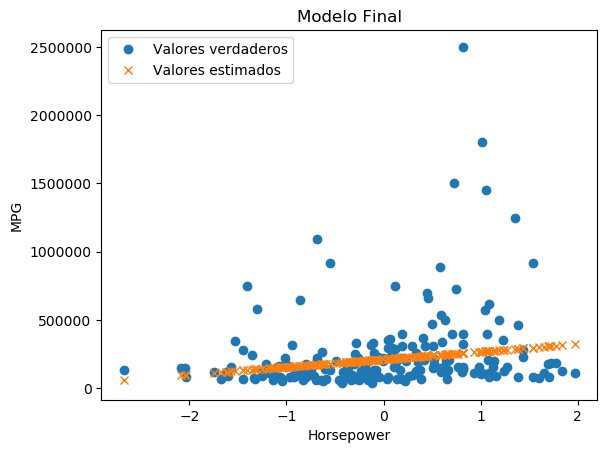

7/7 [==============================] - 0s 6ms/step
296453.11366664094

 

34 
 ('latitud',) 
 4 
 relu 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


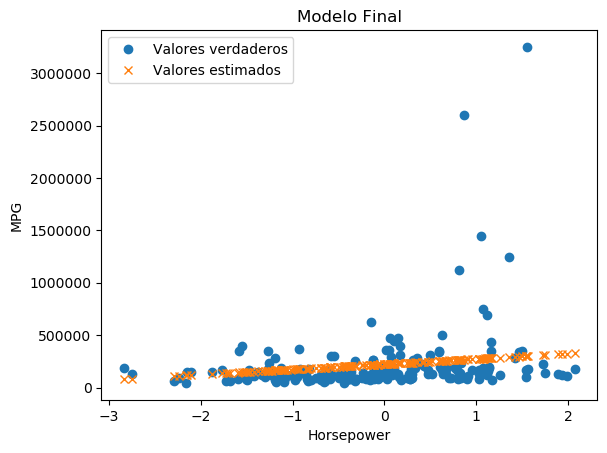

7/7 [==============================] - 0s 3ms/step
316893.50623190607

 

35 
 ('property_surface_total',) 
 3 
 relu 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


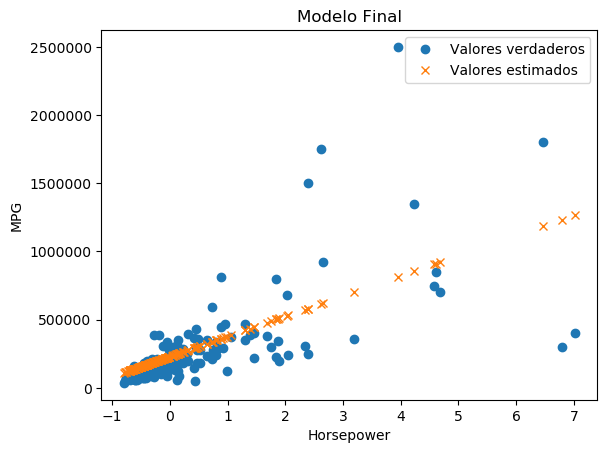

7/7 [==============================] - 0s 2ms/step
216716.35885731946

 

36 
 ('latitud', 'longitud') 
 1 
 sigmoid 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 4ms/step


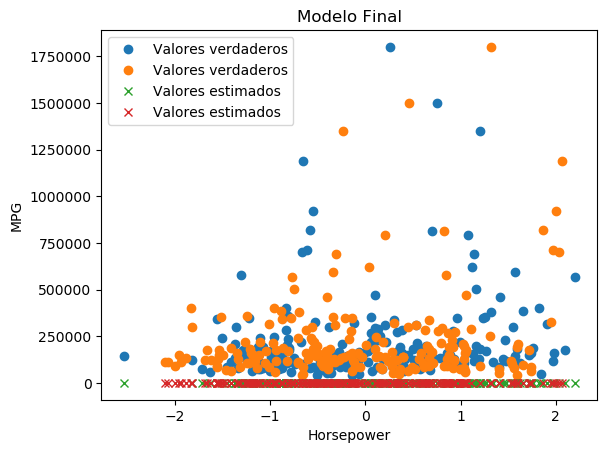

7/7 [==============================] - 0s 2ms/step
325300.991975786

 

37 
 ('latitud', 'property_surface_covered') 
 1 
 relu 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


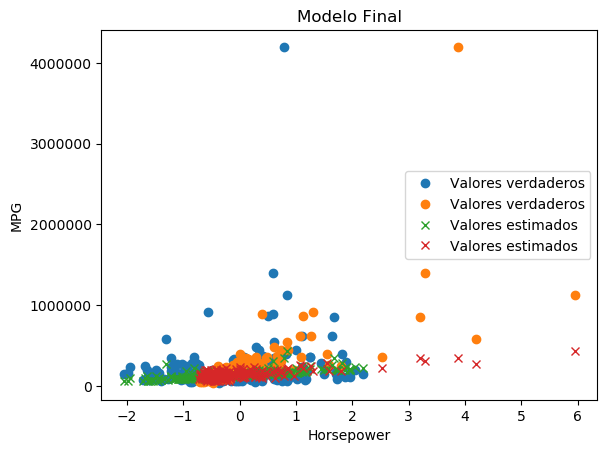

7/7 [==============================] - 0s 2ms/step
315809.1178479845

 

38 
 ('longitud', 'property_surface_covered') 
 9 
 softmax 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


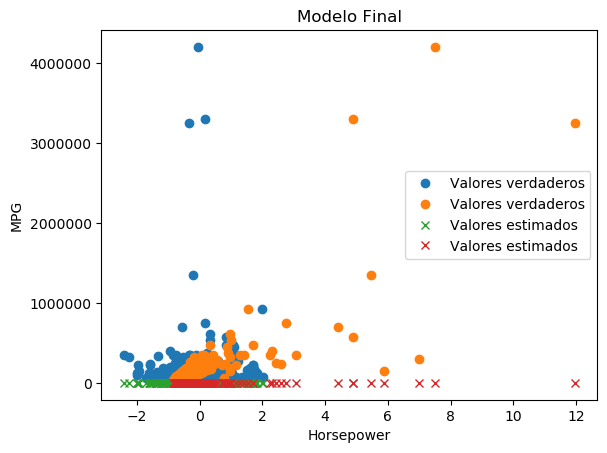

7/7 [==============================] - 0s 3ms/step
499895.57229684124

 

39 
 ('property_surface_covered',) 
 9 
 sigmoid 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


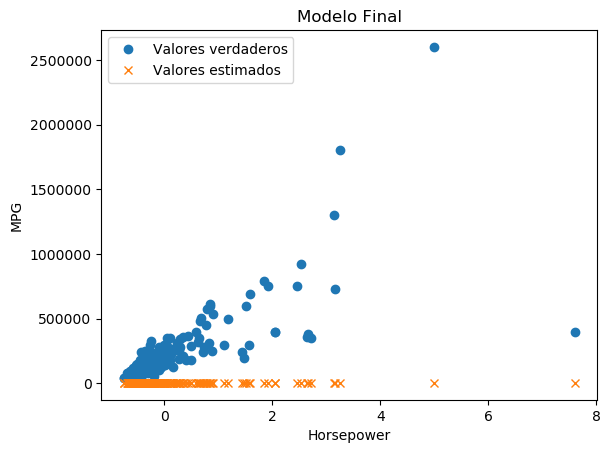

7/7 [==============================] - 0s 2ms/step
345754.61625431443

 

40 
 ('longitud', 'property_surface_total') 
 8 
 sigmoid 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


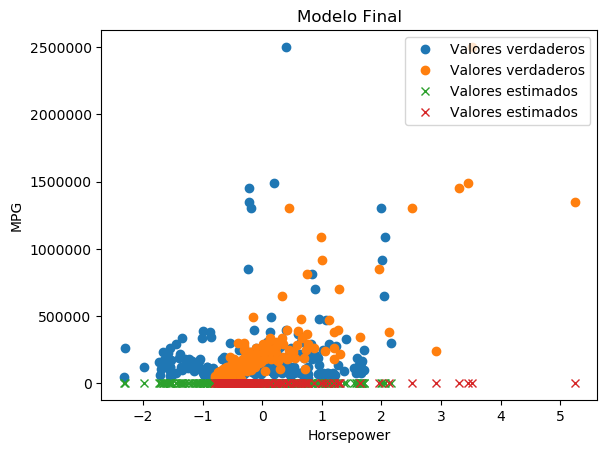

7/7 [==============================] - 0s 2ms/step
361403.7793776499

 

41 
 ('property_surface_total',) 
 7 
 relu 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


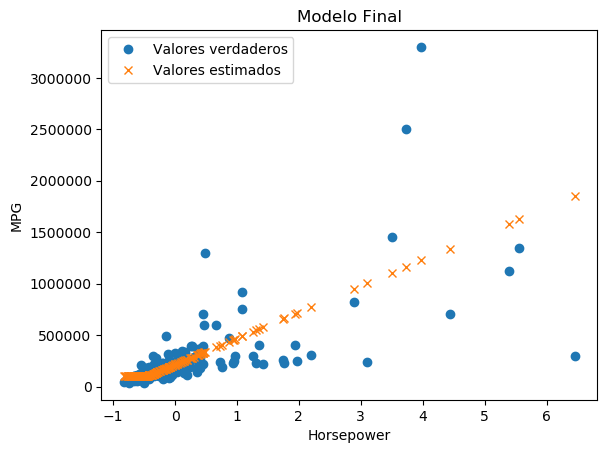

7/7 [==============================] - 0s 3ms/step
258261.2670470593

 

42 
 ('latitud', 'property_surface_total') 
 9 
 softmax 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


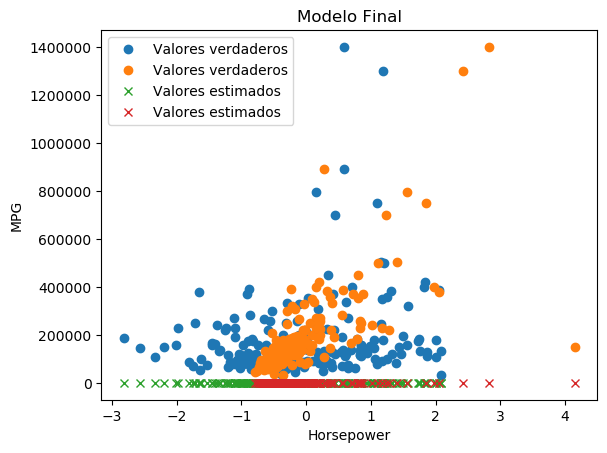

7/7 [==============================] - 0s 2ms/step
251966.8698420509

 

43 
 ('property_surface_covered',) 
 7 
 tanh 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


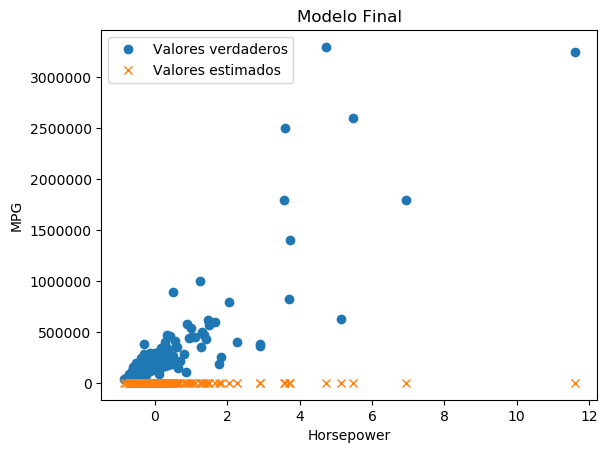

7/7 [==============================] - 0s 2ms/step
525629.2927528152

 

44 
 ('longitud', 'property_surface_total') 
 6 
 softmax 
 <function funcion_optimizadoraRMSPROP at 0x7f151d86b040> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


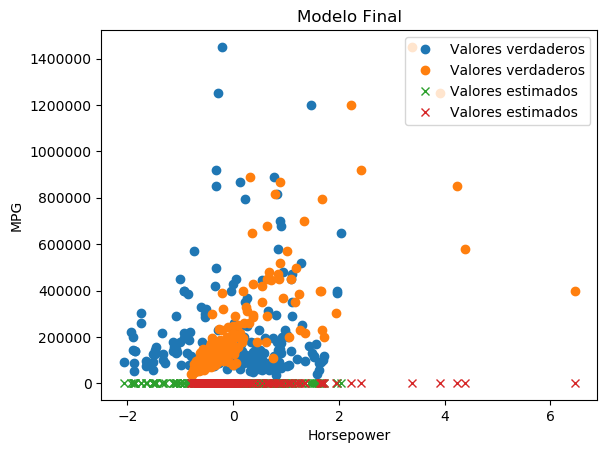

7/7 [==============================] - 0s 3ms/step
305256.2157648743

 

45 
 ('property_surface_covered',) 
 9 
 relu 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


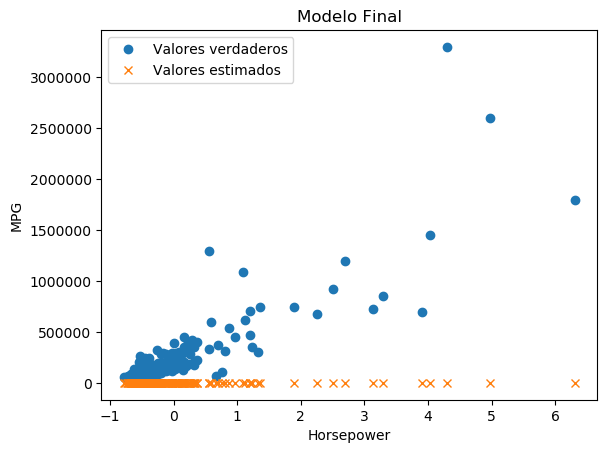

7/7 [==============================] - 0s 2ms/step
440492.89909652097

 

46 
 ('property_surface_total',) 
 9 
 tanh 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 3ms/step


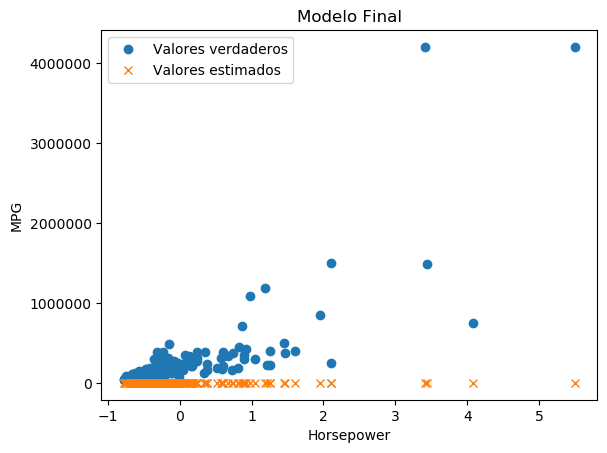

7/7 [==============================] - 0s 4ms/step
506348.02629590983

 

47 
 ('property_surface_covered',) 
 3 
 tanh 
 <function funcion_optimizadoraADAMAX at 0x7f151d86b0d0> 
 0.01 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


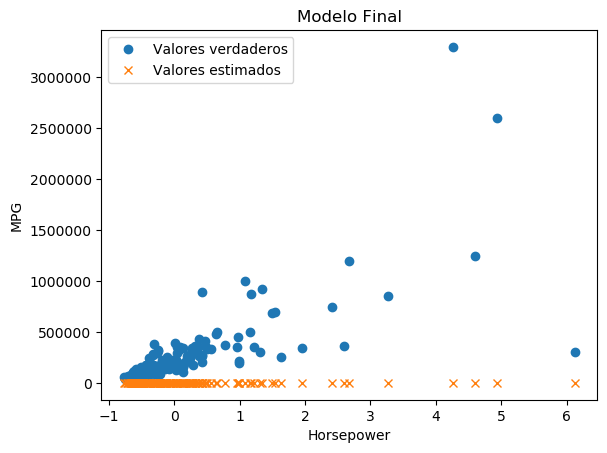

7/7 [==============================] - 0s 3ms/step
410693.73868647235

 

48 
 ('latitud', 'property_surface_total') 
 3 
 softmax 
 <function funcion_optimizadoraNADAM at 0x7f151d8afa60> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


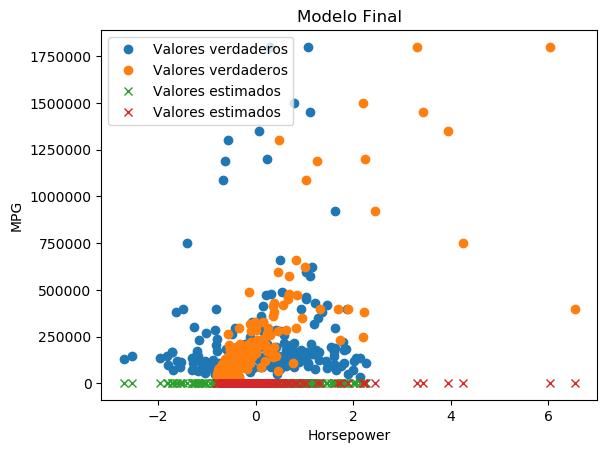

7/7 [==============================] - 0s 2ms/step
374992.77554933634

 

49 
 ('longitud',) 
 4 
 softmax 
 <function funcion_optimizadoraADADELTA at 0x7f151d86b160> 
 0.1 



/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
/home/pal/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.

7/7 [==============================] - 0s 2ms/step


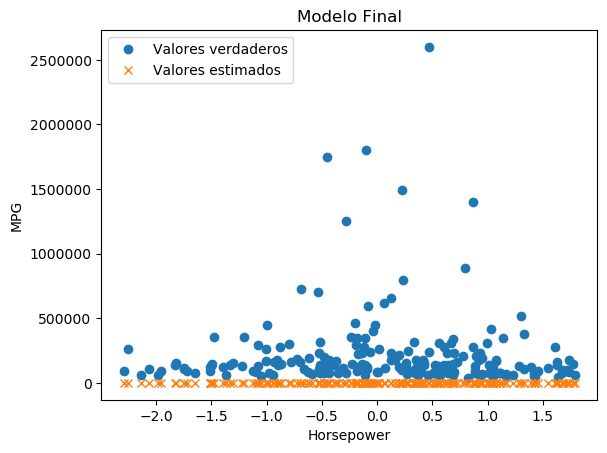

7/7 [==============================] - 0s 3ms/step
378409.96306544123


In [293]:
resultados = random_validator(50, posibles_variables_predictoras, posibles_cantidad_de_primera_capa, 
    posibles_funcion_activacion, posibles_optimizador, posibles_learning_rate)

216716.35885731946
7/7 [==============================] - 0s 2ms/step


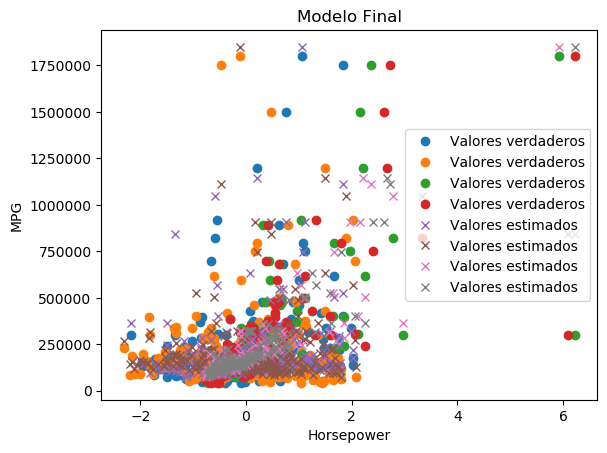

7/7 [==============================] - 0s 5ms/step


112622.7151795445

In [302]:
minimo = 100000000000000
for i in resultados:
    minimo = min(minimo, i[1])
print(minimo)


modelo.entrenar_modelo()
modelo.testear_modelo()

In [ ]:
variables_predictoras=['latitud','longitud', 'property_surface_total', 'property_surface_covered']
#X = surf_tot, Y = price


7/7 [==============================] - 0s 2ms/step


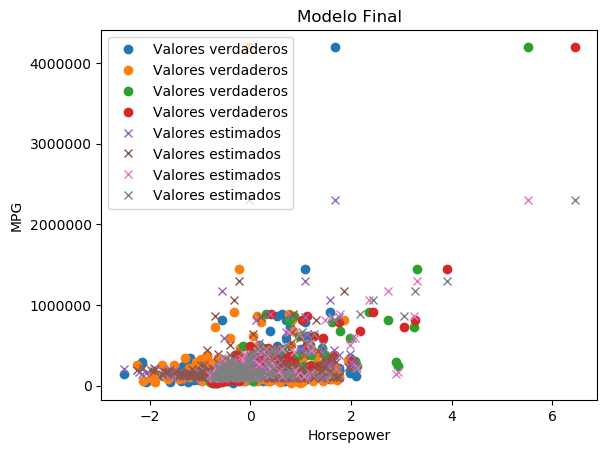

In [ ]:
# Creo un modelo Red Neuronal
d_in=4
d_out=1

modelo3 = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    keras.layers.Dense(4, activation="relu" ),
    keras.layers.Dense(3, activation="relu" ),
    keras.layers.Dense(2, activation="relu" ),
    keras.layers.Dense(d_out, )])

modelo3.compile(
  optimizer=keras.optimizers.Nadam(learning_rate=0.1), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  metrics=['mae'], 
)

modelo3.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

plot_regression(modelo3,x_test_transform,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

In [ ]:
def intento(optimizador):
    d_in=4
    d_out=1

    modelo3 = keras.Sequential([
        # input_shape solo en la primer capa
        # Capa con 2 salidas, activación relu
        keras.layers.Dense(2,input_shape=(d_in,), activation="relu"),
        # Capa con 50 salidas, activación tanh
        keras.layers.Dense(50, activation="relu" ),



        keras.layers.Dense(d_out, )])

    modelo3.compile(
    optimizer= optimizador, 
    loss='mse', 
    # metricas para ir calculando en cada iteracion o batch 
    metrics=['mae'], 
    )

    modelo3.fit(x_train_transform,y_train,epochs=100,batch_size=16,verbose=False)

    plot_regression(modelo3,x_test_transform,y_test,title=f"Modelo Final",xlabel="Horsepower",ylabel="MPG")

    y_pred=modelo3.predict(x_test_transform)
    mse=mean_squared_error(y_test,y_pred)
    return mse ** (1/2)
    

In [ ]:

rate = [0.1,0.01,0.001]
optimizadores = [] 
for i in rate:
    optimizadores.append(keras.optimizers.RMSprop(learning_rate = i))
    optimizadores.append(keras.optimizers.Adamax(learning_rate = i))
    optimizadores.append(keras.optimizers.Nadam(learning_rate = i))
    optimizadores.append(keras.optimizers.Adadelta(learning_rate = i))


In [ ]:
def crossValidator_1parametro(parametros, funcion):
    resultados = []
    for j in range(len(parametros)):
        print(j)
        resultados.append(funcion(parametros[j]))
    return resultados

In [ ]:
def cross_validator_2parametros(parametros1, parametros2,funcion):
    resultados = []
    for i in range(len(parametros1)-1):
        print(i)
        resultados.append([])
        for j in range(len(parametros2) - 1):
            resultados[i].append(funcion(parametros1[i], parametros2[j]))
    return resultados

0
7/7 [==============================] - 0s 2ms/step


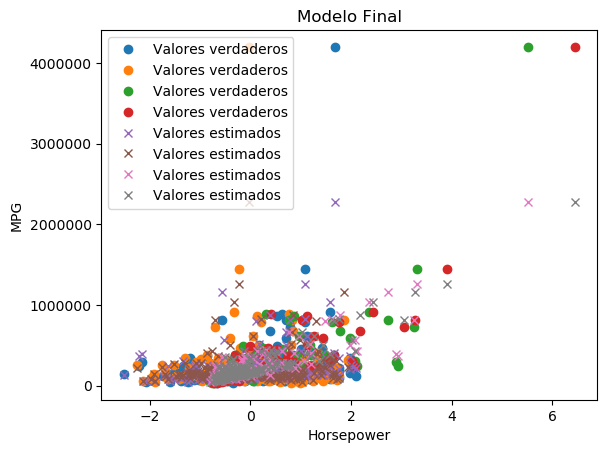

7/7 [==============================] - 0s 3ms/step
1
7/7 [==============================] - 0s 2ms/step


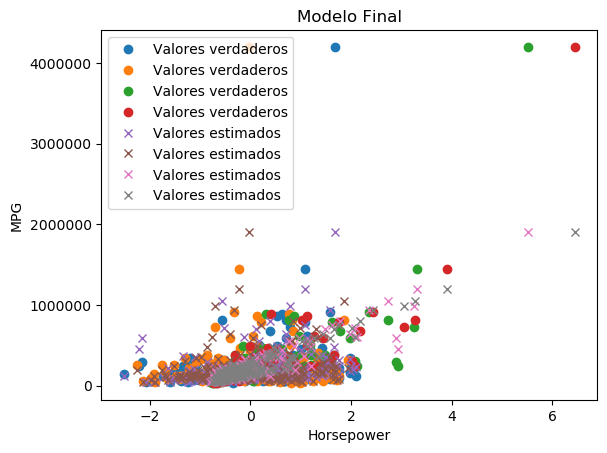

7/7 [==============================] - 0s 3ms/step
2
7/7 [==============================] - 0s 2ms/step


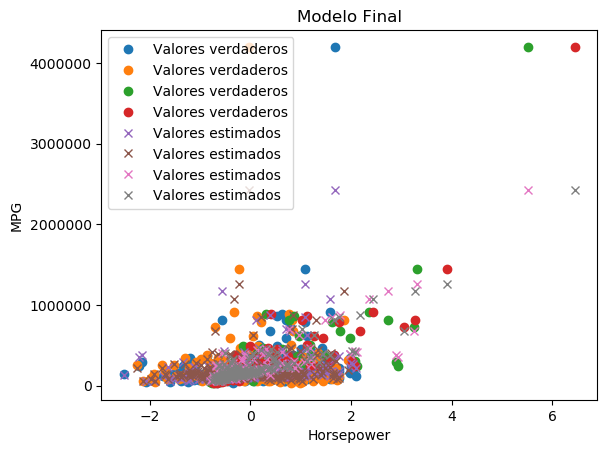

7/7 [==============================] - 0s 2ms/step
3
7/7 [==============================] - 0s 3ms/step


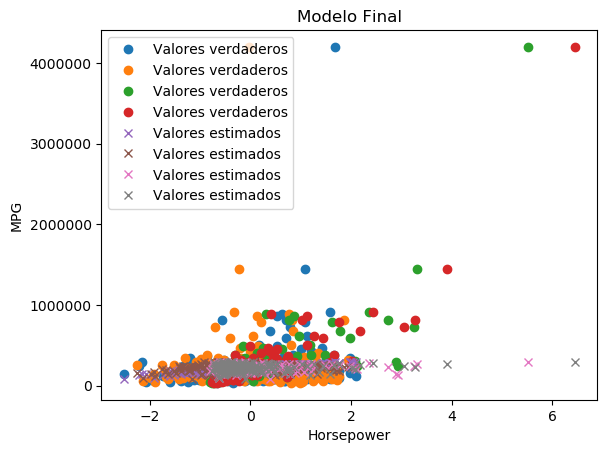

7/7 [==============================] - 0s 3ms/step
4
7/7 [==============================] - 0s 2ms/step


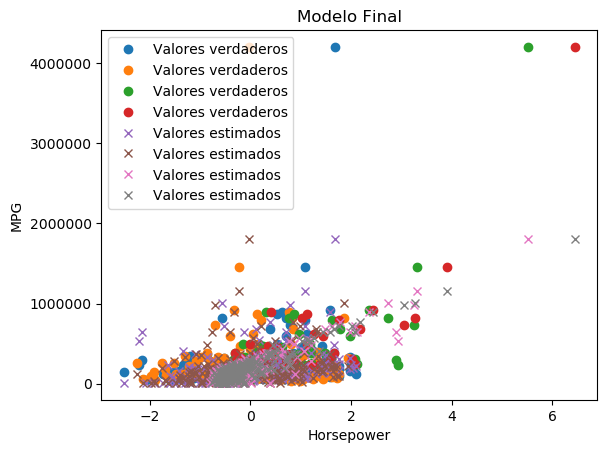

7/7 [==============================] - 0s 2ms/step
5
7/7 [==============================] - 0s 3ms/step


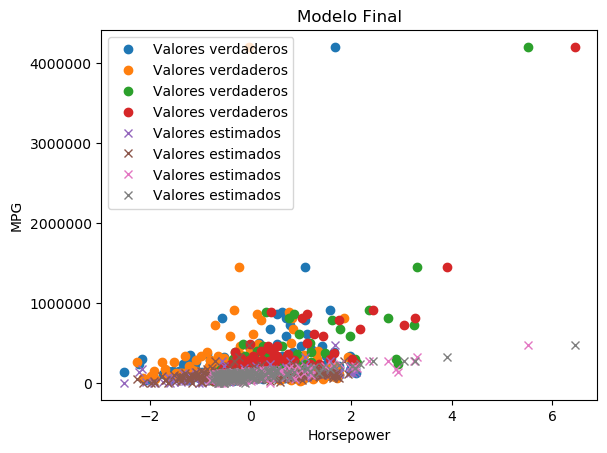

7/7 [==============================] - 0s 3ms/step
6
7/7 [==============================] - 0s 2ms/step


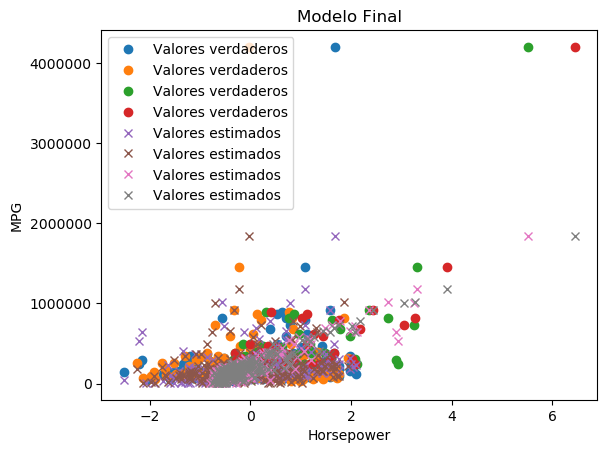

7/7 [==============================] - 0s 4ms/step
7
7/7 [==============================] - 0s 3ms/step


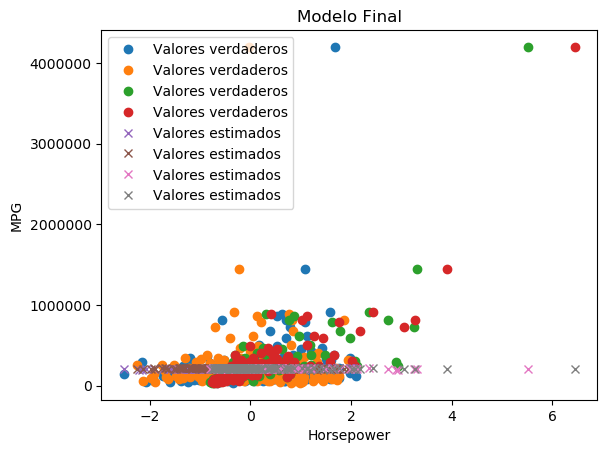

7/7 [==============================] - 0s 2ms/step
8
7/7 [==============================] - 0s 3ms/step


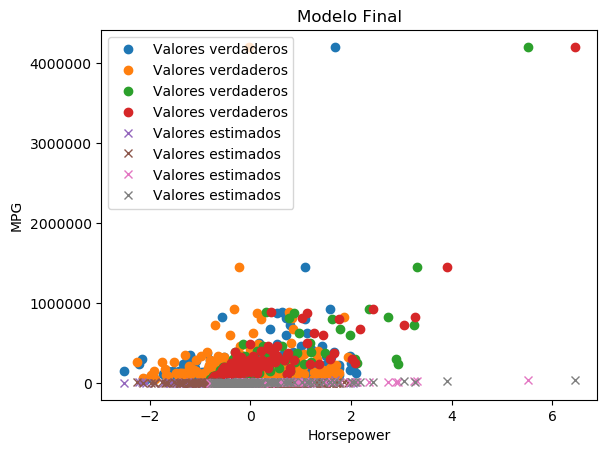

7/7 [==============================] - 0s 3ms/step
9
7/7 [==============================] - 0s 5ms/step


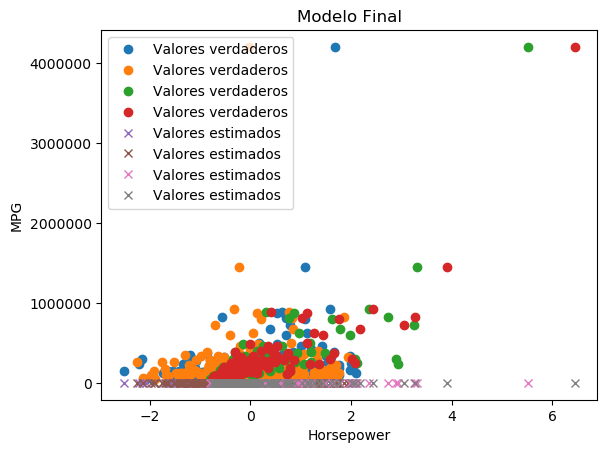

7/7 [==============================] - 0s 4ms/step
10
7/7 [==============================] - 0s 2ms/step


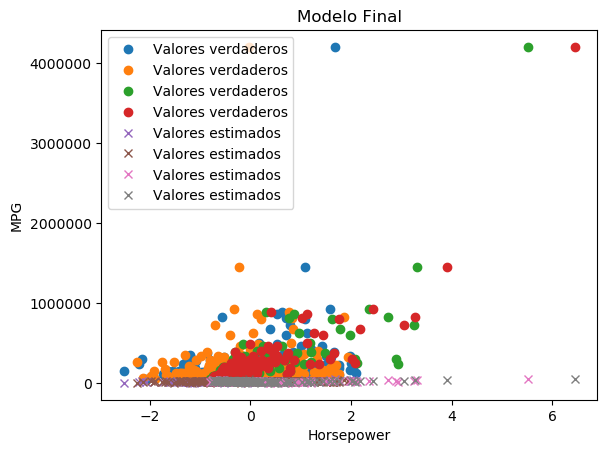

7/7 [==============================] - 0s 3ms/step


In [ ]:

resultados = crossValidator_1parametro(optimizadores, intento)


In [ ]:
print(resultados)
print(min(resultados))

[164944.6699139997, 188692.46758640988, 159137.87547648756, 329778.5308624808, 200345.87626589797, 319863.12178838905, 197369.2481620933, 338707.7591070561, 399367.26871781715, 404937.80823218, 392020.0911424521]
159137.87547648756


In [ ]:
for i in range(len(params_grid)-1):
    print(f'El modelo {params_grid[i]} dio en la metrica rmse {resultados[i].round()}')

: 

In [ ]:
y_pred=modelo3.predict(x_test_transform)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

print(f"Error absoluto medio {mae}")
print(f"Error cuadrático medio {mse}")
print(f"rmse {mse**(1/2)}")

: 

Comparamos con el modelo 2

In [ ]:
plot_regression(modelo2,x_test_transform,y_test,title=f"Modelo Final",xlabel="sup tot",ylabel="precio")

: 

## Clasificación:

# 3. Ensamble de Modelos

## Voting

In [19]:
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


In [20]:
#Importo los datos de entrenamiento y prueba de nuestro Random Forest

y_train = pd.read_csv('./TP1/Datasets/y_train_property_type.csv').copy()
y_test = pd.read_csv('./TP1/Datasets/y_test_property_type.csv').copy()

x_train = pd.read_csv('./TP1/Datasets/x_train_property_type.csv').copy()
x_test = pd.read_csv('./TP1/Datasets/x_test_property_type.csv').copy()


Voy a evaluar distintos clasificadores para ver cual me conviene para obtener mejores metricas.

In [21]:
# Predicciones con decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)


# Predicciones con logistic regression model
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)


# Predicciones con naive bayes model
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

# Predicciones con modelo AdaBoost
ada_boost_clf = AdaBoostClassifier()
ada_boost_clf.fit(x_train, y_train)
y_pred_ada = ada_boost_clf.predict(x_test)

# Predicciones con modelo Random Forest
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train, y_train)
y_pred_rnd = rnd_clf.predict(x_test)

# Predicciones con modelo KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred_knn = knn_clf.predict(x_test)




# evaluating the models based on their f-1 scores
f1_dtc = f1_score(y_test, y_pred_dtc,average='weighted')
f1_lr = f1_score(y_test, y_pred_lr,average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb,average='weighted')
f1_rnd = f1_score(y_test, y_pred_rnd,average='weighted')
f1_knn = f1_score(y_test, y_pred_knn,average='weighted')
f1_ada = f1_score(y_test, y_pred_ada,average='weighted')

# print the f-1 scores
print('F1-score of decision tree classifier: {}'.format(np.round(f1_dtc,4)))
print('F1-score of support vector machine: {}'.format(np.round(f1_lr,4)))
print('F1-score of naive bayes classifier: {}'.format(np.round(f1_gnb,4)))
print('F1-score of random forest classifier: {}'.format(np.round(f1_rnd,4)))
print('F1-score of KNN classifier: {}'.format(np.round(f1_knn,4)))
print('F1-score of AdaBoost classifier: {}'.format(np.round(f1_ada,4)))

F1-score of decision tree classifier: 0.7051
F1-score of support vector machine: 0.5457
F1-score of naive bayes classifier: 0.3733
F1-score of random forest classifier: 0.7451
F1-score of KNN classifier: 0.6111
F1-score of AdaBoost classifier: 0.5932


Aca podemos ver que los mejores 3 modelos fueron los de Decision Tree Classifier, Random Forest Classifier y KNN.
Procedo a realizar el Voting con dichos tres modelos.
Para obtener mejores resultados, tambien voy a evaluar realizando una votacion de tipo Hard y una de tipo Soft y utilizar la que mejores resultados de.

In [23]:
#Creo clasificadores

dtc_clf = DecisionTreeClassifier()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

#Creo ensemble de Votación Hard
vot_clf_h = VotingClassifier(estimators = [('dtc', dtc_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Creo ensemble de Votación Soft
vot_clf_s = VotingClassifier(estimators = [('dtc', dtc_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'soft')


#Entreno ambos ensembles
vot_clf_h.fit(x_train, y_train)
vot_clf_s.fit(x_train, y_train)

#Evaluo en conjunto de test
pred_h = vot_clf_h.predict(x_test)
pred_s = vot_clf_s.predict(x_test)



#Calculo accuracy
print("RESULTADOS HARD VOTING:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, pred_h)))
print('F1-score: {}'.format(f1_score(y_test, pred_h,average="weighted")))
print("Precision Score : ",precision_score(y_test,pred_h,pos_label='positive',average="weighted"))
print("Recall Score :" , recall_score(y_test, pred_h, pos_label='positive',average="weighted"))

print("\nRESULTADOS SOFT VOTING:\n")
print('Accuracy Score: {}'.format(accuracy_score(y_test, pred_s)))
print('F1-score: {}'.format(f1_score(y_test, pred_s,average="weighted")))
print("Precision Score: ",precision_score(y_test,pred_s,pos_label='positive',average="weighted"))
print("Recall Score:" , recall_score(y_test, pred_s, pos_label='positive',average="weighted"))

RESULTADOS HARD VOTING:

Accuracy Score: 0.7330426356589147
F1-score: 0.7325673315978177
Precision Score :  0.7336933775486353
Recall Score : 0.7330426356589147

RESULTADOS SOFT VOTING:

Accuracy Score: 0.7258828596037898
F1-score: 0.7253054999623219
Precision Score :  0.7260450948692784
Recall Score : 0.7258828596037898


Concluimos que conviene utilizar el metodo de Hard voting.

## Stacking

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
%matplotlib inline

from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
import warnings

warnings.simplefilter('ignore')


from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

In [7]:
#Importo los modelos del TP1

gbr = joblib.load('./TP1/Models/rand_GBR')
knn = joblib.load('./TP1/Models/rand_knn')
xgboost = joblib.load('./TP1/Models/rand_xgb')

[18:55:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [12]:
#Importo los datos de entrenamiento y prueba de nuestro Random Forest

y_train = pd.read_csv('./TP1/Datasets/y_train_knn_property_type.csv').copy()
y_test = pd.read_csv('./TP1/Datasets/y_test_knn_property_type.csv').copy()

x_train = pd.read_csv('./TP1/Datasets/x_train_knn_property_type.csv').copy()
x_test = pd.read_csv('./TP1/Datasets/x_test_knn_property_type.csv').copy()

In [18]:
#Here, we are using XGBRegressor as a Machine Learning model to fit the data.
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
print(); print(model)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [20]:
#Now we have predicted the output by passing X_test and also stored real target in expected_y.
expected_y  = y_test
predicted_y = model.predict(x_test)

0.8854929818375497
0.05832367593818469


<AxesSubplot:xlabel='property_price'>

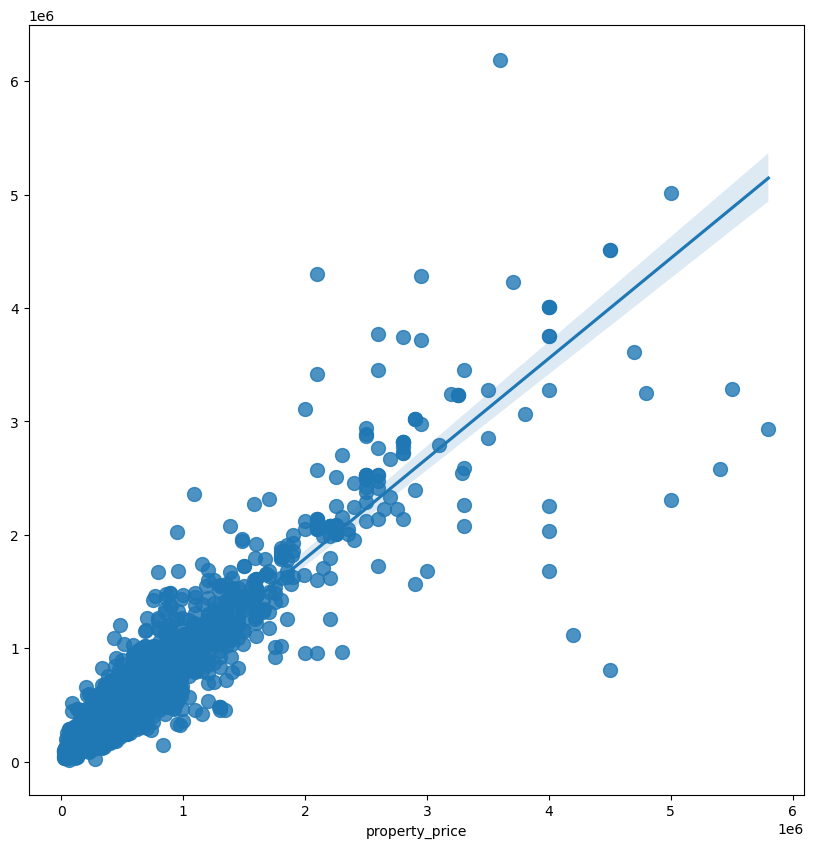

In [21]:
print(r2_score(expected_y, predicted_y))
print(mean_squared_log_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
"""import joblib
joblib.dump(base_models, './Models/base_models')
joblib.dump(model_scores, './Models/model_scores')
joblib.dump(meta_model, './Models/meta_model')
joblib.dump(stacking_model, './Models/stacking_model')
joblib.dump(stacking_scores, './Models/stacking_scores')
joblib.dump(y_pred_st, './Models/y_pred_st')"""

['./Models/y_pred_st']

## Prueba 2 Stacking

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.simplefilter('ignore')
import joblib

from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [2]:
#Importo los modelos del TP1

gbr = joblib.load('./TP1/Models/rand_GBR')
knn = joblib.load('./TP1/Models/rand_knn')
xgboost = joblib.load('./TP1/Models/rand_xgb')

[20:03:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [3]:
#Importo los datos de entrenamiento y prueba de nuestro Random Forest

y_train = pd.read_csv('./TP1/Datasets/y_train_knn_property_type.csv').copy()
y_test = pd.read_csv('./TP1/Datasets/y_test_knn_property_type.csv').copy()

x_train = pd.read_csv('./TP1/Datasets/x_train_knn_property_type.csv').copy()
x_test = pd.read_csv('./TP1/Datasets/x_test_knn_property_type.csv').copy()

y_train = y_train.head(1000)
y_test = y_test.head(1000)
x_train = x_train.head(1000)
x_test = x_test.head(1000)

In [5]:
# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

"""
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[xgboost, gbr, knn], 
                           meta_regressor=svr_rbf)"""

# Training the stacking classifier

stregr.fit(x_train, y_train)
stregr.predict(x_test)

# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(x_test) - y_test) ** 2))
print('Variance Score: %.4f' % stregr.score(x_train, y_train))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(x_train, y_train, c='lightgray')
    plt.plot(x_train, stregr.predict(x_test), c='darkgreen', lw=2)

plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 1000

## Prueba 3 Stacking

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.simplefilter('ignore')
import joblib

from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [7]:
#Importo los modelos del TP1

gbr = joblib.load('./TP1/Models/rand_GBR')
knn = joblib.load('./TP1/Models/rand_knn')
xgboost = joblib.load('./TP1/Models/rand_xgb')

[02:00:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [8]:
#Importo los datos de entrenamiento y prueba de nuestro Random Forest

y_train = pd.read_csv('./TP1/Datasets/y_train_knn_property_type.csv').copy()
y_test = pd.read_csv('./TP1/Datasets/y_test_knn_property_type.csv').copy()

x_train = pd.read_csv('./TP1/Datasets/x_train_knn_property_type.csv').copy()
x_test = pd.read_csv('./TP1/Datasets/x_test_knn_property_type.csv').copy()

y_train = y_train.head(1000)
y_test = y_test.head(1000)
x_train = x_train.head(1000)
x_test = x_test.head(1000)

In [9]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

In [10]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor()
 models['cart'] = DecisionTreeRegressor()
 models['svm'] = SVR()
 return models

In [11]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 return scores

>knn -85310.164 (19612.786)
>cart -74808.761 (18018.935)
>svm -125851.642 (23360.986)


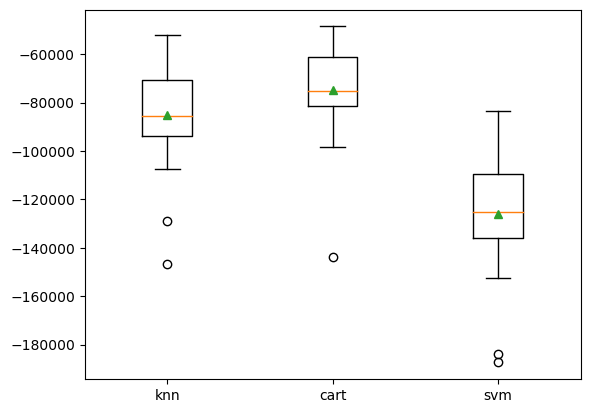

In [12]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, x_train, y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [13]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('knn', KNeighborsRegressor()))
 level0.append(('cart', DecisionTreeRegressor()))
 level0.append(('svm', SVR()))

 # define meta learner model
 level1 = LinearRegression()

 # define the stacking ensemble
 model = StackingRegressor(estimators=level0, 
                                    final_estimator=level1, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)
 
 return model

In [14]:
# get a list of models to evaluate

def get_models():
 models = dict()
 models['knn'] = KNeighborsRegressor()
 models['cart'] = DecisionTreeRegressor()
 models['svm'] = SVR()
 models['stacking'] = get_stacking()

 return models

In [15]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [16]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()


In [17]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


TypeError: __init__() got an unexpected keyword argument 'estimators'

In [ ]:
#Grafico performance
plot_results(results, name='stacking_model_cv')